In [2]:
#J = 0.1126 # kg*m^2 Solid Works measured
J = 2 * 1.5*(0.35**2) + (1/12)*(2*2.5)*(0.70**2) # 2*J_load * J_beam # approximated
print('J = %.4f kg*m^2' % J)
alpha = 0.4 # rad/s^2
omega_max = 1.0 # rad/s

torque = J * alpha

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')


J = 0.5717 kg*m^2
P_max = 0.2287 W


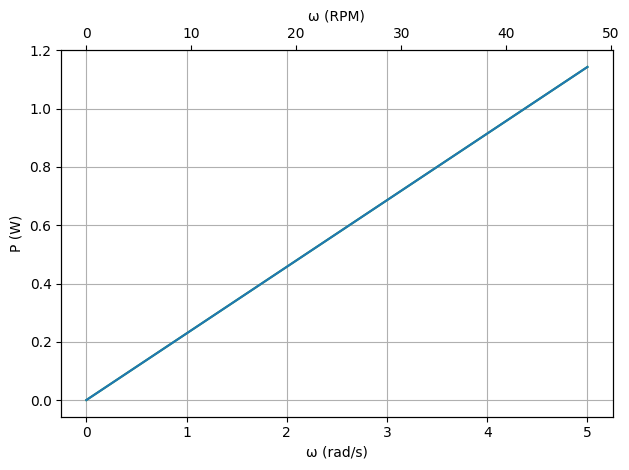

In [10]:
# plot required power vs. omega from 0 to 5 rad/s
# also add two x axses for unit rad/s and rpm
import numpy as np
import matplotlib.pyplot as plt

omega = np.linspace(0, 5, 100)
P = torque * omega

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('ω (rad/s)')
ax1.set_ylabel('P (W)')
ax1.plot(omega, P, color=color)
ax1.tick_params(axis='y')
plt.grid()

ax2 = ax1.twiny()
ax2.set_xlabel('ω (RPM)')
ax2.plot(omega * 60/(2*np.pi), P)
ax2.tick_params(axis='x')

fig.tight_layout()

plt.show()


Prismatic

In [12]:
r_pulley = 6.37 / 1000 # m
m_load  = 2 * 2 # kg # assumed

a = 0.250 # m/s^2 # requirement
v_max = 0.500 # m/s # requirement

omega_max = v_max / r_pulley

torque = m_load * a * r_pulley # approx without belt tension

P_max = torque * omega_max
print(f'P_max = {P_max:.4f} W')



P_max = 0.5000 W


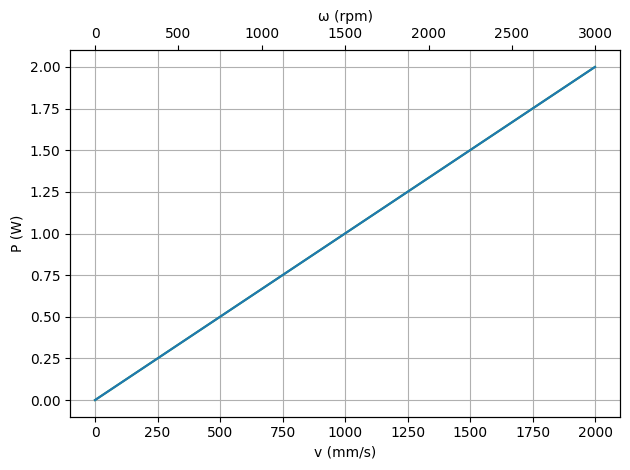

In [16]:
# plot required power vs. omega or speed from 0 to 2.000 m/s
# also add two x axses for unit mm/s and rpm

def P_at_omega(omega):
    return (m_load * a * r_pulley) * omega

def P_at_v(v):
    return (m_load * a * r_pulley) * (v / r_pulley)

v = np.linspace(0, 2.0, 1000)
v_mm = v * 1000
P = P_at_v(v)

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('v (mm/s)')
ax1.set_ylabel('P (W)')
ax1.plot(v_mm, P, color=color)

ax1.tick_params(axis='y')
plt.grid()

ax2 = ax1.twiny()
ax2.set_xlabel('ω (rpm)')
ax2.plot(v * 60/(2*np.pi*r_pulley), P)
ax2.tick_params(axis='x')

fig.tight_layout()
plt.show()